In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Kanzashi,1941
1,24 Hours,1931
2,Red Mantis,2009
3,Ruby Skye P.I.: The Spam Scam,2010
4,County General,2005


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
c= cast
t = titles

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

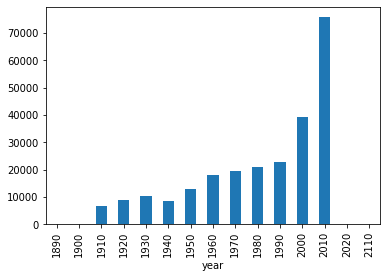

In [9]:
t.groupby(t.year//10*10).size().plot(kind = 'bar')

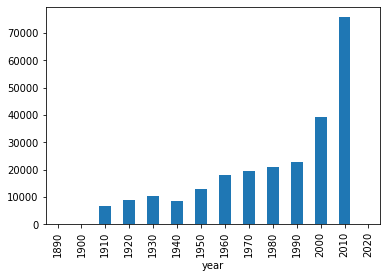

In [14]:
tf = t.groupby(t.year//10*10).size()
tf[tf > 1].plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

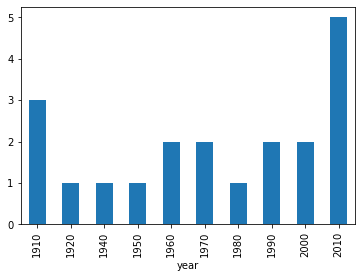

In [17]:
t[t.title == 'Hamlet'].groupby(t.year//10*10).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [7]:
c[(c.n == 1) & (c.year//10 == 195)].groupby(['type']).size()

type
actor      6692
actress    3040
dtype: int64

In [8]:
c[(c.n == 1) & (c.year//10 == 195)].groupby(c.type).size()

type
actor      6692
actress    3040
dtype: int64

In [9]:
# I am very curious, as before, about how the groupby function actually works here.

# I suspect that it will work as long as it has the same index. Let's try it

gt1 = c[(c.n == 1) & (c.year//10 == 195)].type.head()
gt1

c[(c.n == 1) & (c.year//10 == 195)].groupby(gt1).size()

2004    actor
2005    actor
2006    actor
2007    actor
2008    actor
Name: type, dtype: object

type
actor    5
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [11]:
a = pd.Series(['actor', 'actress'])
a

0      actor
1    actress
dtype: object

In [15]:
c[(c.n <= 5)&(c.year//10 == 195)].groupby([c.type, c.n]).size()

type     n  
actor    1.0    6692
         2.0    4640
         3.0    5654
         4.0    5663
         5.0    5674
actress  1.0    3040
         2.0    4635
         3.0    3201
         4.0    2881
         5.0    2592
dtype: int64

In [16]:
c[(c.n <= 5)&(c.year//10 == 195)].groupby(['type', 'n']).size()

type     n  
actor    1.0    6692
         2.0    4640
         3.0    5654
         4.0    5663
         5.0    5674
actress  1.0    3040
         2.0    4635
         3.0    3201
         4.0    2881
         5.0    2592
dtype: int64

In [12]:
c[(c.n <= 5)&(c.year//10 == 195)].groupby(a).size()

Series([], dtype: int64)

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [12]:
c[c.title == 'The Pink Panther'].groupby(['year'])[['n']].max()

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [24]:
fo = c[c.name == 'Frank Oz'].groupby(['title', 'year']).size()
# fo
fo[fo > 1].sort_index(level = 1)

title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
dtype: int64

In [ ]:
# I could have just groupby year first and then title. That way it will be in year ascending order

### List each of the characters that Frank Oz has portrayed at least twice.

In [27]:
fo1 = c[c.name == 'Frank Oz'].groupby(['character']).size()
fo1[fo1 > 1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64